In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

In [2]:
df = pd.read_csv('C:\\Users\\Minh Chi\\Downloads\\boDuLieu\\lab 9\\khachhang.csv')
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [3]:
# df.isna().sum()
df.set_index('Customer Id', inplace=True)
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,6.8
847,28,2,7,34,0.359,2.021,0.0,7.0
848,25,4,0,18,2.802,3.210,1.0,33.4


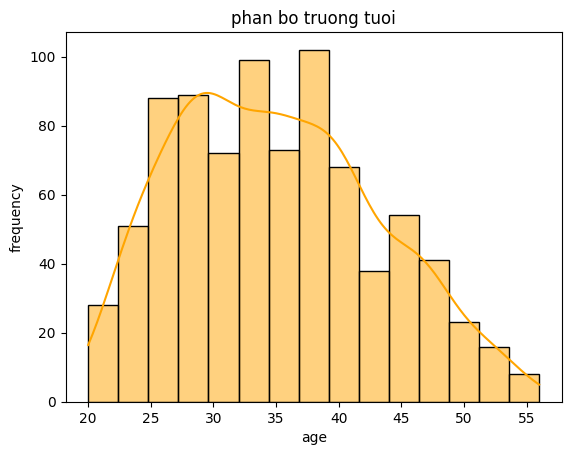

<Figure size 640x480 with 0 Axes>

In [4]:
df['Age'].describe()

sb.histplot(df['Age'], kde=True, color= 'orange')
plt.title('phan bo truong tuoi')
plt.xlabel('age')
plt.ylabel('frequency')

plt.show()
plt.tight_layout()

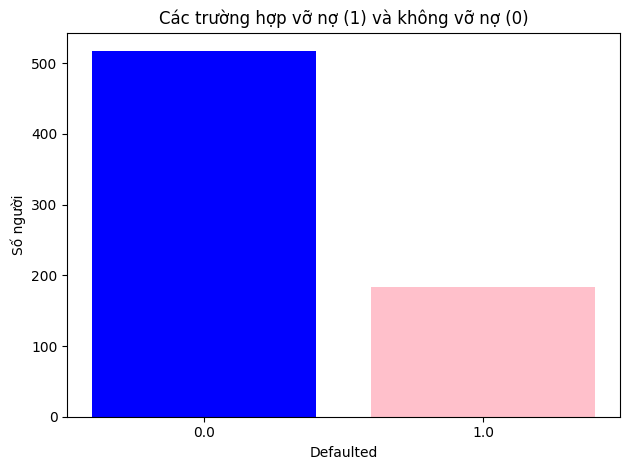

In [5]:
# plt.figure(figsize=(6,4))
counts = df['Defaulted'].value_counts().sort_index()
plt.bar(
    x=counts.index.astype(str),
    height=counts.values,
    color=['blue','pink']
)
plt.title('Các trường hợp vỡ nợ (1) và không vỡ nợ (0)')
plt.xlabel('Defaulted')
plt.ylabel('Số người')
plt.tight_layout()
plt.show()


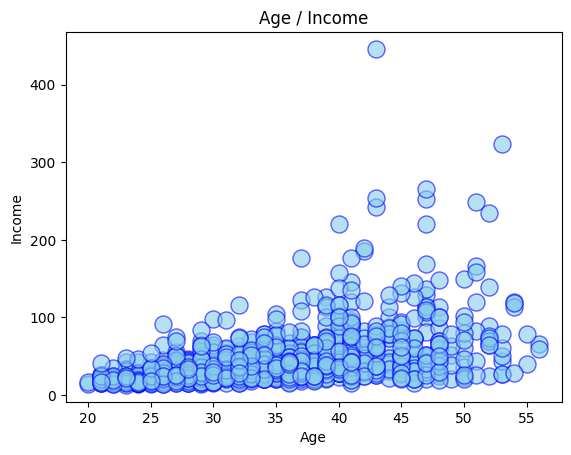

In [6]:
df.plot(kind = 'scatter', x= 'Age', y = 'Income', color= 'skyblue', s = 150, alpha= 0.6, edgecolor = 'b')
plt.title('Age / Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

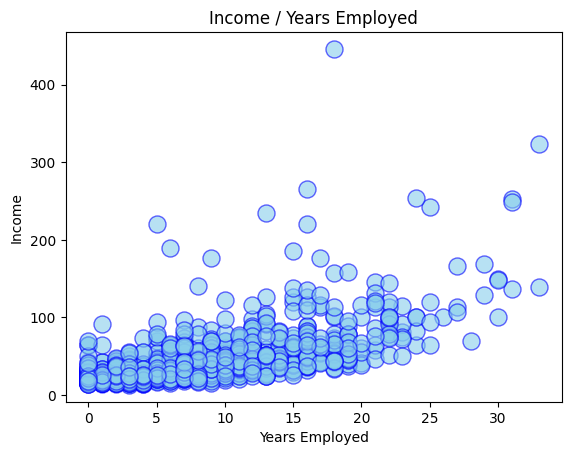

In [7]:
df.plot(kind = 'scatter', x= 'Years Employed', y = 'Income', color= 'skyblue', s = 150, alpha= 0.6, edgecolor = 'b')
plt.title('Income / Years Employed')
plt.xlabel('Years Employed')
plt.ylabel('Income')
plt.show()

In [10]:
#xử lý dữ liệu
# Chuyển DataFrame df thành mảng numpy (ndarray).
X = df.values
# Thay thế toàn bộ giá trị NaN (missing) hoặc vô hạn (inf, -inf) trong X bằng số 0 hoặc số phù hợp.
X = np.nan_to_num(X)

sc = StandardScaler()
cluster_data = sc.fit_transform(X)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])
df

Cluster data samples :  [[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.52379654  0.39138677]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.90913822  1.59755385]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.52379654 -0.44250653]]


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,6.8
847,28,2,7,34,0.359,2.021,0.0,7.0
848,25,4,0,18,2.802,3.210,1.0,33.4


In [1]:
#Phân cụm dữ liệu (xây dựng mô hình) với số cụm là 3 lặp tối đa 12 lần
cluster = 3
model = KMeans(init='k-means++', 
               n_clusters=cluster,
               n_init=12)
model.fit(X)
label = model.labels_
print(cl(label[:100], attrs=['bold']))

NameError: name 'KMeans' is not defined

In [12]:
df['cluster_num'] = label
df
print(cl(df.head(), attrs = ['bold']))

             Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
Customer Id                                                            
1             41    2               6      19      0.124       1.073   
2             47    1              26     100      4.582       8.218   
3             33    2              10      57      6.111       5.802   
4             29    2               4      19      0.681       0.516   
5             47    1              31     253      9.308       8.908   

             Defaulted  DebtIncomeRatio  cluster_num  
Customer Id                                           
1                  0.0              6.3            0  
2                  0.0             12.8            2  
3                  1.0             20.9            0  
4                  0.0              6.3            0  
5                  0.0              7.2            1  


In [13]:
# sử dụng phương thức 'groupby' để nhóm giá trị cụm và xem giá trị trung bình của từng thuộc tính 
#trong tập dữ liệu bằng phương pháp 'mean'.
print(cl(df.groupby('cluster_num').mean(), attrs = ['bold']))

                   Age       Edu  Years Employed      Income  Card Debt  \
cluster_num                                                               
0            32.964561  1.614792        6.374422   31.164869   1.032541   
1            45.388889  2.666667       19.555556  227.166667   5.678444   
2            41.333333  1.956284       15.256831   83.928962   3.103639   

             Other Debt  Defaulted  DebtIncomeRatio  
cluster_num                                          
0              2.104133   0.285185        10.094761  
1             10.907167   0.285714         7.322222  
2              5.765279   0.171233        10.724590  


C:\Users\Minh Chi\AppData\Local\Temp\ipykernel_10400\4180296486.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = 'upper left', fontsize = 14)


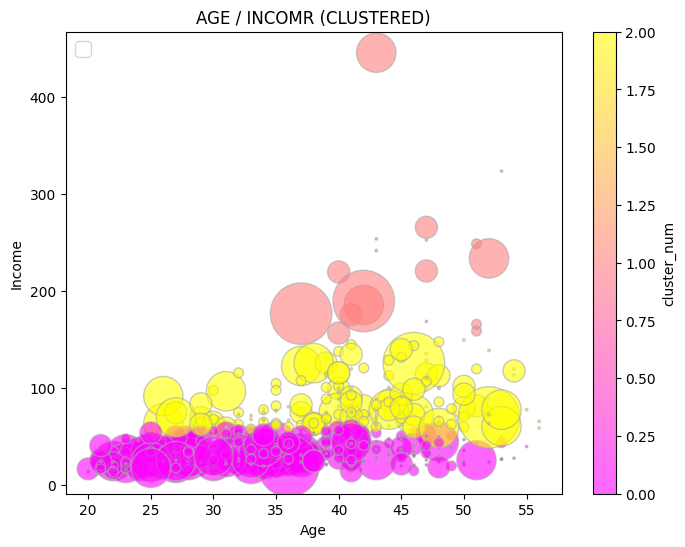

In [14]:
# Như vậy, sinh viên (hoặc khách hàng) 
# có trình độ (Edu) cao hơn sẽ cho ra điểm to hơn, giúp bạn “nhìn” xem nhóm tuổi-thu nhập đó có học vấn cao hay thấp.
area = np.pi * (df.Edu) ** 4 #Tính area cho mỗi điểm bằng công thức π × (Edu⁴).

ax = df.plot(
    kind='scatter',
    x='Age',
    y='Income',
    c='cluster_num',           # màu theo cluster
    cmap='spring',             # dải màu
    s=area,                    # kích thước điểm
    alpha=0.6,                 # độ trong suốt
    edgecolor='darkgrey',      # viền chấm
    figsize=(8, 6)
)
plt.title('AGE / INCOMR (CLUSTERED)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(loc = 'upper left', fontsize = 14)

plt.show()

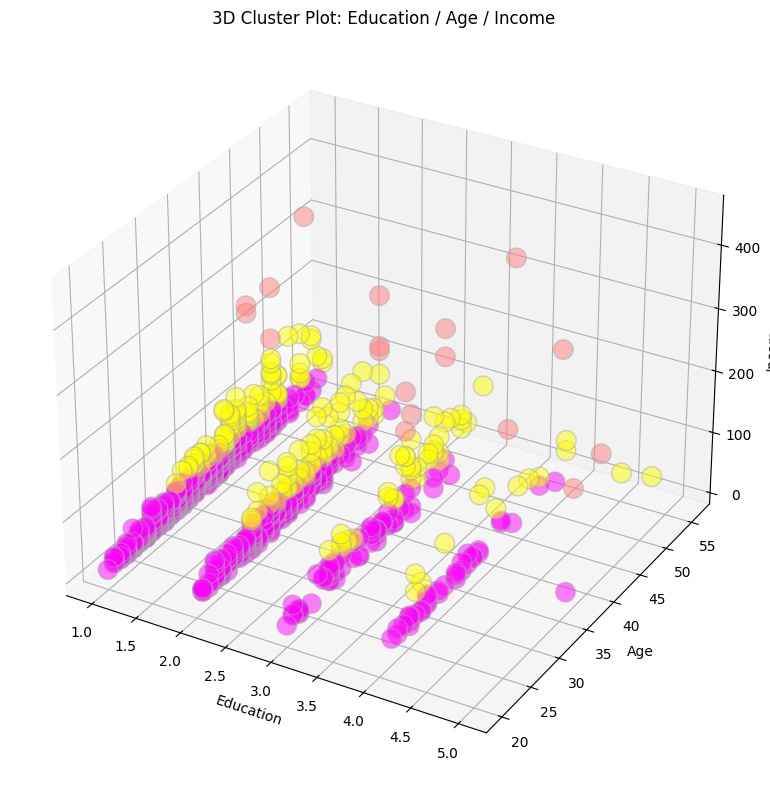

In [15]:
fig = plt.figure(figsize=(10, 8))  # thêm size nếu cần
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Edu'], df['Age'], df['Income'], 
           c=df['cluster_num'], 
           s=200, 
           cmap='spring', 
           alpha=0.5, 
           edgecolor='darkgrey')

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

plt.title('3D Cluster Plot: Education / Age / Income')
plt.tight_layout()
plt.show()